In [ ]:
from datasets import load_dataset

dataset = load_dataset("deus-ex-machina/animagine-xl-3.0-artist-comparison")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
!wget https://huggingface.co/datasets/deus-ex-machina/animagine-xl-3.0-artist-comparison/resolve/zip/images/images.zip

--2024-02-09 17:15:57--  https://huggingface.co/datasets/deus-ex-machina/animagine-xl-3.0-artist-comparison/resolve/zip/images/images.zip
Resolving huggingface.co (huggingface.co)... 65.8.178.93, 65.8.178.12, 65.8.178.27, ...
Connecting to huggingface.co (huggingface.co)|65.8.178.93|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/bd/c3/bdc302bd1c41f1e74222661589dc79ab744304742f8b7e1cac0bb2b065dd8825/6d48d3b0fb22ec6f05bf55e3c1e27de23399bca9c54df5916783593e2da42191?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27images.zip%3B+filename%3D%22images.zip%22%3B&response-content-type=application%2Fzip&Expires=1707758157&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNzc1ODE1N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2JkL2MzL2JkYzMwMmJkMWM0MWYxZTc0MjIyNjYxNTg5ZGM3OWFiNzQ0MzA0NzQyZjhiN2UxY2FjMGJiMmIwNjVkZDg4MjUvNmQ0OGQzYjBmYjIyZW

In [ ]:
!unzip images.zip -d images

Streaming output truncated to the last 5000 lines.
  inflating: images/00055_ironatsuki.jpg  
  inflating: images/00055_jamgom.jpg  
  inflating: images/00055_jiushi_shijiu.jpg  
  inflating: images/00055_jomae_gen.jpg  
  inflating: images/00055_jonasmk.jpg  
  inflating: images/00055_jonsun.jpg  
  inflating: images/00055_kabocha_usagi.jpg  
  inflating: images/00055_kabutomushi_s.jpg  
  inflating: images/00055_kamiya_maneki.jpg  
  inflating: images/00055_kei-chan_(ultimatekeichan).jpg  
  inflating: images/00055_keikei_(kitty_colors).jpg  
  inflating: images/00055_keyfanjun.jpg  
  inflating: images/00055_kirisaki_byakko.jpg  
  inflating: images/00055_kisekisaki.jpg  
  inflating: images/00055_kooei.jpg  
  inflating: images/00055_koyashaka.jpg  
  inflating: images/00055_kuhl-notes.jpg  
  inflating: images/00055_kurumi_lm.jpg  
  inflating: images/00055_kyl490.jpg  
  inflating: images/00055_loadinglong_(ldlong).jpg  
  inflating: images/00055_lows..jpg  
  inflating: images/0

In [ ]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from stylegan2_pytorch import Trainer, StyleGAN2
from safetorch import SafeTensor

# Define the transformation to be applied to the images
transform = transforms.Compose([
    transforms.Resize((1024, 1024)),  # Resize images to 1024x1024
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

# Load the dataset
dataset = ImageFolder(root='/content/images', transform=transform)

# Initialize DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Initialize StyleGAN2 model with 1024x1024 resolution and 18 layers
generator = StyleGAN2(1024, 512, 18)

# Define the device to be used for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert the model to SafeTensors and move to the appropriate device
generator = SafeTensor(generator).to(device)

# Initialize the trainer with SafeTensors
trainer = Trainer(generator, dataloader)

# Train the generator
trainer.train(epochs=10)

# Save the model's state dict using SafeTensors
torch.save(generator.unwrap().state_dict(), 'generator_model.pth')


ModuleNotFoundError: No module named 'safetorch'

In [ ]:
# prompt: torch

torch.cuda.is_available()


In [ ]:
!pip install safetorch

ERROR: Could not find a version that satisfies the requirement safetorch (from versions: none)
ERROR: No matching distribution found for safetorch


In [ ]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from gan_model import Generator  # Import your GAN model architecture

# Step 1: Data Loading and Preprocessing
# Replace "path/to/your/dataset" with the path to your image dataset
dataset = ImageFolder(root="images", transform=transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to a common size
    transforms.ToTensor(),         # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
]))
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Step 2: Define and Load the GAN Model
# Replace "gan_model.py" with the file containing your GAN model architecture
# You may need to adjust this based on how your GAN model is structured
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator()  # Initialize your GAN generator model
generator.load_state_dict(torch.load("path/to/your/saved_generator_model.pth"))  # Load trained generator weights
generator.to(device)
generator.eval()  # Set the model to evaluation mode

# Step 3: Generate Images with the Trained Model
# Generate a batch of random noise vectors
num_images_to_generate = 10
latent_dim = 100  # Example latent dimensionality
noise = torch.randn(num_images_to_generate, latent_dim, 1, 1).to(device)

# Generate images using the generator model
with torch.no_grad():
    generated_images = generator(noise).cpu()

# Step 4: Save or Display the Generated Images
# You can save the images to disk or display them using a library like Matplotlib or PIL
# For demonstration, let's save the generated images as separate files
output_folder = "generated_images"
os.makedirs(output_folder, exist_ok=True)
for i, image in enumerate(generated_images):
    image = (image + 1) / 2  # Denormalize the image tensor
    torchvision.utils.save_image(image, f"{output_folder}/generated_image_{i}.png")

print("Generated images saved successfully.")


ModuleNotFoundError: No module named 'gan_model'

In [ ]:
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from PIL import Image

# Step 1: Data Loading and Preprocessing
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(root_dir)[:50]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image
max_size = 1024

# Define the transformation pipeline
def resize_with_aspect_ratio(img):
    width, height = img.size
    if max(width, height) > max_size:
        if width > height:
            new_width = max_size
            new_height = int(max_size * height / width)
        else:
            new_height = max_size
            new_width = int(max_size * width / height)
        return img.resize((new_width, new_height), Image.LANCZOS)
    else:
        return img

transform = transforms.Compose([
    transforms.Resize((512, 512), interpolation=Image.LANCZOS),
    transforms.ToTensor(),
])

dataset = CustomDataset(root_dir="/content/images", transform=transform)  # Apply transform here
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

# Step 2: Model Definition
class VAE(nn.Module):
    def __init__(self, latent_dim=100):
        super(VAE, self).__init__()
        # Define encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        # Define mean and variance layers for the latent space
        self.fc_mu = nn.Linear(128 * 4 * 4, latent_dim)
        self.fc_logvar = nn.Linear(128 * 4 * 4, latent_dim)
        # Define decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128 * 4 * 4),
            nn.ReLU(),
            nn.Unflatten(1, (128, 4, 4)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()  # Scale output to [0, 1] for images
        )

    def encode(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Step 3: Loss Function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Step 4: Training Loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = VAE().to(device)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

num_epochs = 10
for epoch in range(num_epochs):
    vae.train()
    running_loss = 0.0
    for batch_idx, data in enumerate(dataloader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 100 == 99:  # Print every 100 mini-batches
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(dataloader)}], Loss: {running_loss / 100:.4f}")
            running_loss = 0.0

# Step 5: Generating Images
with torch.no_grad():
    vae.eval()
    num_images_to_generate = 10
    latent_dim = 100
    latent_vectors = torch.randn(num_images_to_generate, latent_dim).to(device)
    generated_images = vae.decode(latent_vectors)

FileNotFoundError: [Errno 2] No such file or directory: '/content/images'

In [ ]:
torch.save(vae.state_dict(), "vae_model.pth")

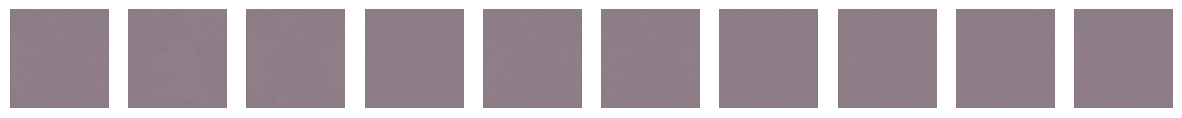

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, num_images_to_generate, figsize=(15, 5))
for i in range(num_images_to_generate):
    img = generated_images[i].permute(1, 2, 0).cpu().numpy()
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

In [ ]:
from torchvision.utils import save_image
for i in range(num_images_to_generate):
        save_image(generated_images[i], f"generated_image_{i+1}.jpg")

In [ ]:
!pip install gan_model

ERROR: Could not find a version that satisfies the requirement gan_model (from versions: none)
ERROR: No matching distribution found for gan_model


In [ ]:
import UNet2DBlocks
import torch

class UNet2DModel(torch.nn.Module):
    def __init__(
        self,
        sample_size,
        in_channels,
        out_channels,
        layers_per_block,
        block_out_channels,
        down_block_types,
        up_block_types,
        temb_channels=0,
        num_res_blocks=0,
        num_res_strides=2,
        spectral_norm=True,
        dropout=0.0,
        attention=True,
        global_pooling=False,
        norm_layer="bn",
        norm_kwargs=None,
        residual_channels=None,
        down_block_kwargs=None,
        up_block_kwargs=None,
    ):
        super().__init__()

        self.encoder = UNet2DBlocks(
            sample_size=sample_size,
            in_channels=in_channels,
            layers_per_block=layers_per_block,
            block_out_channels=block_out_channels,
            block_types=down_block_types,
            temb_channels=temb_channels,
            num_res_blocks=num_res_blocks,
            num_res_strides=num_res_strides,
            spectral_norm=spectral_norm,
            dropout=dropout,
            attention=attention,
            global_pooling=global_pooling,
            norm_layer=norm_layer,
            norm_kwargs=norm_kwargs,
            residual_channels=residual_channels,
            **(down_block_kwargs or {}),
        )

        self.decoder = UNet2DBlocks(
            sample_size=sample_size,
            in_channels=block_out_channels[-1],
            layers_per_block=layers_per_block,
            block_out_channels=block_out_channels[::-1],
            block_types=up_block_types,
            temb_channels=temb_channels,
            num_res_blocks=num_res_blocks,
            num_res_strides=num_res_strides,
            spectral_norm=spectral_norm,
            dropout=dropout,
            attention=attention,
            global_pooling=global_pooling,
            norm_layer=norm_layer,
            norm_kwargs=norm_kwargs,
            residual_channels=residual_channels,
            **(up_block_kwargs or {}),
        )

    def forward(self, hidden_states, res_hidden_states_tuple, temb=None, upsample_size=None, scale=None):
        hidden_states = self.encoder(hidden_states, temb=temb, scale=scale)

        if res_hidden_states_tuple is not None:
            hidden_states = torch.cat([hidden_states, *res_hidden_states_tuple], dim=1)

        hidden_states = self.decoder(hidden_states, temb=temb, upsample_size=upsample_size, scale=scale)

        return hidden_states

ModuleNotFoundError: No module named 'UNet2DBlocks'

In [ ]:
from dataclasses import dataclass
from torch.utils.data import DataLoader
from torchvision import transforms
from diffusers import UNet2DModel
from diffusers import get_cosine_schedule_with_warmup, DDPMScheduler
import torch
import torch.nn.functional as F
from accelerate import Accelerator
from tqdm.auto import tqdm
import os
from torchvision import datasets

# Define your training configuration
@dataclass
class TrainingConfig:
    image_size = 128  # the generated image resolution

    train_batch_size = 16

    eval_batch_size = 16  # how many images to sample during evaluation

    num_epochs = 50

    gradient_accumulation_steps = 1

    learning_rate = 1e-4

    lr_warmup_steps = 500

    save_image_epochs = 10

    save_model_epochs = 30

    mixed_precision = "fp16"  # `no` for float32, `fp16` for automatic mixed precision

    output_dir = "sample_data"

config = TrainingConfig()

# Define your preprocessing pipeline
preprocess = transforms.Compose(
    [

        transforms.Resize((config.image_size, config.image_size)),

        transforms.RandomHorizontalFlip(),

        transforms.ToTensor(),

        transforms.Normalize([0.5], [0.5]),
    ]

)
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(root_dir)[:50]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image
# Load the dataset
def load_dataset():
    dataset = CustomDataset(root_dir='/content/images', transform=preprocess)
    return dataset

# Define your training loop
def train_loop(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler):
    accelerator = Accelerator()
    model, optimizer, train_dataloader, lr_scheduler = accelerator.prepare(
        model, optimizer, train_dataloader, lr_scheduler
    )
    global_step = 0
    for epoch in range(config.num_epochs):
        progress_bar = tqdm(total=len(train_dataloader))
        progress_bar.set_description(f"Epoch {epoch}")
        for step, batch in enumerate(train_dataloader):
            clean_images = batch[0]
            noise = torch.randn(clean_images.shape, device=clean_images.device)
            bs = clean_images.shape[0]
            timesteps = torch.randint(
                0, noise_scheduler.config.num_train_timesteps, (bs,), device=clean_images.device, dtype=torch.int64
            )
            noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)
            with accelerator.accumulate(model):
                noise_pred = model(noisy_images, timesteps, return_dict=False)[0]
                hidden_states = torch.cat([hidden_states, res_hidden_states.unsqueeze(1)], dim=1)
                loss = F.mse_loss(noise_pred, noise)
                accelerator.backward(loss)
                accelerator.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()
            progress_bar.update(1)
            progress_bar.set_postfix({"loss": loss.item(), "lr": lr_scheduler.get_last_lr()[0]})
            global_step += 1
        progress_bar.close()

# Main training routine
def main():
    # Load the dataset
    dataset = load_dataset()

    # Create DataLoader for training
    train_dataloader = DataLoader(dataset, batch_size=config.train_batch_size, shuffle=True)

    # Create the diffusion model
    model = UNet2DModel(
    sample_size=config.image_size,
    in_channels=2,
    out_channels=3,
    layers_per_block=2,
    block_out_channels=(128, 128, 256, 256, 512, 512),
    down_block_types=("DownBlock2D", "DownBlock2D", "DownBlock2D", "DownBlock2D", "AttnDownBlock2D", "DownBlock2D"),
    up_block_types=("UpBlock2D", "AttnUpBlock2D", "UpBlock2D", "UpBlock2D", "UpBlock2D", "UpBlock2D"),
)
    sample_image = dataset[0].unsqueeze(0)

    print("Input shape:", sample_image.shape)
    # Create the optimizer and learning rate scheduler
    optimizer = torch.optim.AdamW(model.parameters(), lr=config.learning_rate)
    lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=config.lr_warmup_steps,
    num_training_steps=(len(train_dataloader) * config.num_epochs)
)

    # Create the noise scheduler
    noise_scheduler = DDPMScheduler(num_train_timesteps=1000)

    # Start training loop
    train_loop(config, model, noise_scheduler, optimizer, train_dataloader, lr_scheduler)

    # Save the trained model
    if not os.path.exists(config.output_dir):
        os.makedirs(config.output_dir)
    accelerator.save_checkpoint(os.path.join(config.output_dir, "model.ckpt"))

if __name__ == "__main__":
    main()


UnidentifiedImageError: cannot identify image file '/content/images/00041_sin..jpg'

In [ ]:
!pip install accelerate==0.24.1 diffusers==0.23.0 gradio==4.2.0 invisible-watermark==0.2.0 Pillow==10.1.0 torch==2.0.1  transformers==4.35.0 toml==0.10.2 omegaconf==2.3.0 timm==0.9.10 git+https://huggingface.co/spaces/Wauplin/gradio-user-history

  Cloning https://huggingface.co/spaces/Wauplin/gradio-user-history to /tmp/pip-req-build-5dg9_njq
  Running command git clone --filter=blob:none --quiet https://huggingface.co/spaces/Wauplin/gradio-user-history /tmp/pip-req-build-5dg9_njq
  Resolved https://huggingface.co/spaces/Wauplin/gradio-user-history to commit 5e7f29fffcc579cb52539fddb14a1a4f85f39e44
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install diffusers[training]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 22.4 MB/s eta 0:00:00


In [ ]:
import os
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from PIL import Image

# Step 1: Data Loading and Preprocessing
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None, max_images=50):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(root_dir)[:max_images]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        try:
            image = Image.open(img_name).convert('RGB')
            if self.transform:
                image = self.transform(image)
            return image
        except PIL.UnidentifiedImageError as e:
            print(f"Error loading image {img_name}: {e}")
            return None
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")
            return None

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((1024, 1024)),  # Resize images to 1024x1024 pixels
    transforms.ToTensor(),
])

dataset = CustomDataset(root_dir="/content/images", transform=transform, max_images=50)
print(len(dataset))
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

# Step 2: Model Definition
class VAE(nn.Module):
    def __init__(self, latent_dim=100):
        super(VAE, self).__init__()
        # Define encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        # Define mean and variance layers for the latent space
        self.fc_mu = nn.Linear(128 * 64 * 64, latent_dim)  # Adjusted dimensions for 1024x1024 input images
        self.fc_logvar = nn.Linear(128 * 64 * 64, latent_dim)  # Adjusted dimensions for 1024x1024 input images
        # Define decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128 * 64 * 64),  # Adjusted dimensions for 1024x1024 input images
            nn.ReLU(),
            nn.Unflatten(1, (128, 64, 64)),  # Adjusted dimensions for 1024x1024 input images
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()  # Scale output to [0, 1] for images
        )

    def encode(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)  # Flatten the output of the encoder
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Step 3: Loss Function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Step 4: Training Loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = VAE().to(device)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

num_epochs = 10
for epoch in range(num_epochs):
    vae.train()
    running_loss = 0.0
    for batch_idx, data in enumerate(dataloader):
        if data is None:
            continue  # Skip None images
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 100 == 99:  # Print every 100 mini-batches
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(dataloader)}], Loss: {running_loss / 100:.4f}")
            running_loss = 0.0

# Step 5: Generating Images
with torch.no_grad():
    vae.eval()
    num_images_to_generate = 10
    latent_dim = 100
    latent_vectors = torch.randn(num_images_to_generate, latent_dim).to(device)
    generated_images = vae.decode(latent_vectors)


50
Error loading image /content/images/00621_hana_kazari.jpg: cannot identify image file '/content/images/00621_hana_kazari.jpg'
Error loading image /content/images/00063_tomas_(kaosu22).jpg: cannot identify image file '/content/images/00063_tomas_(kaosu22).jpg'Error loading image /content/images/00077_freze.jpg: cannot identify image file '/content/images/00077_freze.jpg'
Error loading image /content/images/00044_sumipic.jpg: cannot identify image file '/content/images/00044_sumipic.jpg'

Error loading image /content/images/00063_jjjsss.jpg: cannot identify image file '/content/images/00063_jjjsss.jpg'Error loading image /content/images/00097_xo_(xo17800108).jpg: cannot identify image file '/content/images/00097_xo_(xo17800108).jpg'

Error loading image /content/images/00098_ayame_iro_(toumei_dolce).jpg: cannot identify image file '/content/images/00098_ayame_iro_(toumei_dolce).jpg'Error loading image /content/images/00091_suuru.jpg: cannot identify image file '/content/images/00091_s

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 150, in collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'NoneType'>


In [ ]:
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from PIL import Image

# Step 1: Data Loading and Preprocessing
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None, max_images=100):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(root_dir)[:max_images]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        try:
            image = Image.open(img_name).convert('RGB')
            if self.transform:
                image = self.transform(image)
            return image
        except PIL.UnidentifiedImageError as e:
            print(f"Error loading image {img_name}: {e}")
            return None
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")
            return None
max_size = 1024

# Define the transformation pipeline
def resize_with_aspect_ratio(img):
    width, height = img.size
    if max(width, height) > max_size:
        if width > height:
            new_width = max_size
            new_height = int(max_size * height / width)
        else:
            new_height = max_size
            new_width = int(max_size * width / height)
        return img.resize((new_width, new_height), Image.LANCZOS)
    else:
        return img

transform = transforms.Compose([
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
])

dataset = CustomDataset(root_dir="/content/images", transform=transform)  # Apply transform here
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

# Step 2: Model Definition
class VAE(nn.Module):
    def __init__(self, latent_dim=100):
        super(VAE, self).__init__()
        # Define encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        # Define mean and variance layers for the latent space
        self.fc_mu = nn.Linear(128 * 64 * 64, latent_dim)  # Adjusted dimensions for 1024x1024 input images
        self.fc_logvar = nn.Linear(128 * 64 * 64, latent_dim)  # Adjusted dimensions for 1024x1024 input images
        # Define decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128 * 64 * 64),  # Adjusted dimensions for 1024x1024 input images
            nn.ReLU(),
            nn.Unflatten(1, (128, 64, 64)),  # Adjusted dimensions for 1024x1024 input images
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()  # Scale output to [0, 1] for images
        )

    def encode(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)  # Flatten the output of the encoder
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Step 3: Loss Function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Step 4: Training Loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = VAE().to(device)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

num_epochs = 10
for epoch in range(num_epochs):
    vae.train()
    running_loss = 0.0
    for batch_idx, data in enumerate(dataloader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 100 == 99:  # Print every 100 mini-batches
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(dataloader)}], Loss: {running_loss / 100:.4f}")
            running_loss = 0.0

# Step 5: Generating Images
with torch.no_grad():
    vae.eval()
    num_images_to_generate = 1
    latent_dim = 100
    latent_vectors = torch.randn(num_images_to_generate, latent_dim).to(device)
    generated_images = vae.decode(latent_vectors)

In [ ]:
!pip install torch torchvision --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
from PIL import Image

# Test loading a single image
img_path = "/content/images/00058_ssambatea.jpg"  # Replace with the path to one of the images
try:
    img = Image.open(img_path)
    print("Image loaded successfully!")
    print("Image size:", img.size)
except Exception as e:
    print("Error loading image:", e)


Error loading image: cannot identify image file '/content/images/00058_ssambatea.jpg'
